In [1]:
import pandas as pd
import pyspark
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, explode, trim, col, sum, when, round

In [2]:
spark = SparkSession.builder.appName("JobSatisfactionDataScience").getOrCreate()

In [3]:
df = spark.read.csv("dataset/devsdd.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- Respondent: integer (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: 

In [4]:
print("Null values in DevType column:")
df.filter(col('DevType').isNull()).count()

Null values in DevType column:


65

In [5]:
df = df.filter(df["DevType"].isNotNull())

In [6]:
df_devtype = df.withColumn("DevType", split(col("DevType"), ";")) \
                        .withColumn("DevType", explode(col("DevType"))) \
                        .withColumn("DevType", trim(col("DevType")))

# Count all unique DevType values
devtype_counts = df_devtype.groupBy("DevType").count().orderBy("count", ascending=False)

# Show all developer types with counts
devtype_counts.show(truncate=False, n=100)

+---------------------------------------------+-----+
|DevType                                      |count|
+---------------------------------------------+-----+
|Developer, full-stack                        |6928 |
|Developer, back-end                          |6290 |
|Developer, front-end                         |3920 |
|Developer, desktop or enterprise applications|2575 |
|Developer, mobile                            |1959 |
|DevOps specialist                            |1639 |
|Database administrator                       |1413 |
|System administrator                         |1202 |
|Designer                                     |988  |
|Developer, QA or test                        |911  |
|Developer, embedded applications or devices  |854  |
|Engineer, data                               |832  |
|Data scientist or machine learning specialist|803  |
|Data or business analyst                     |802  |
|Student                                      |766  |
|Academic researcher        

In [7]:
ds_roles = [
    "Data scientist or machine learning specialist",
    "Engineer, data",
    "Academic researcher",
    "Scientist",
    "Data or business analyst"
]
df_filtered = df.filter(col("DevType").isin(ds_roles))
df_filtered.select("DevType").groupBy("DevType").count().orderBy("count", ascending=False).show(truncate=False)

+---------------------------------------------+-----+
|DevType                                      |count|
+---------------------------------------------+-----+
|Data scientist or machine learning specialist|61   |
|Engineer, data                               |36   |
|Data or business analyst                     |35   |
|Academic researcher                          |19   |
|Scientist                                    |10   |
+---------------------------------------------+-----+



In [8]:
print(df.columns)

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase']


In [9]:
job_related = ["DevType","Employment","JobFactors"]
salary = ["ConvertedComp", "CompFreq", "Country"]
# experience = ["EdLevel", "YearsCodePro", "LastHireDate","OrgSize"]
environment = ["Dependents","WorkRemote","WorkLoc",
               "WorkWeekHrs","WorkPlan","WorkChallenge"]
management = ["MgrIdiot", "MgrMoney", "MgrWant"]
satisfaction = ["JobSat"]

df_job_related = df_filtered.select(*job_related, *satisfaction)
df_salary = df_filtered.select(*salary, *satisfaction)
# df_experience = df_filtered.select(*experience, *satisfaction)
df_environment = df_filtered.select(*environment, *satisfaction)
df_management = df_filtered.select(*management, *satisfaction)

### **Job Related Factors**

In [10]:
df_job_related.groupBy("DevType").count().show()
df_job_related.groupBy("Employment").count().show()

+--------------------+-----+
|             DevType|count|
+--------------------+-----+
|           Scientist|   10|
|Data scientist or...|   61|
|Data or business ...|   35|
| Academic researcher|   19|
|      Engineer, data|   36|
+--------------------+-----+

+------------------+-----+
|        Employment|count|
+------------------+-----+
|Employed part-time|    5|
|Employed full-time|  156|
+------------------+-----+



In [11]:
df_job_related.groupBy("JobFactors").count().show()

+--------------------+-----+
|          JobFactors|count|
+--------------------+-----+
|Financial perform...|    1|
|Languages, framew...|    5|
|Languages, framew...|    4|
|Industry that I'd...|    3|
|Languages, framew...|    2|
|Specific departme...|    4|
|Office environmen...|    6|
|Opportunities for...|    1|
|Specific departme...|    2|
|Industry that I'd...|    2|
|Industry that I'd...|    3|
|Languages, framew...|    1|
|Office environmen...|    9|
|Financial perform...|    4|
|Industry that I'd...|    1|
|Languages, framew...|    2|
|Office environmen...|    1|
|Languages, framew...|    3|
|Financial perform...|    3|
|Specific departme...|    2|
+--------------------+-----+
only showing top 20 rows



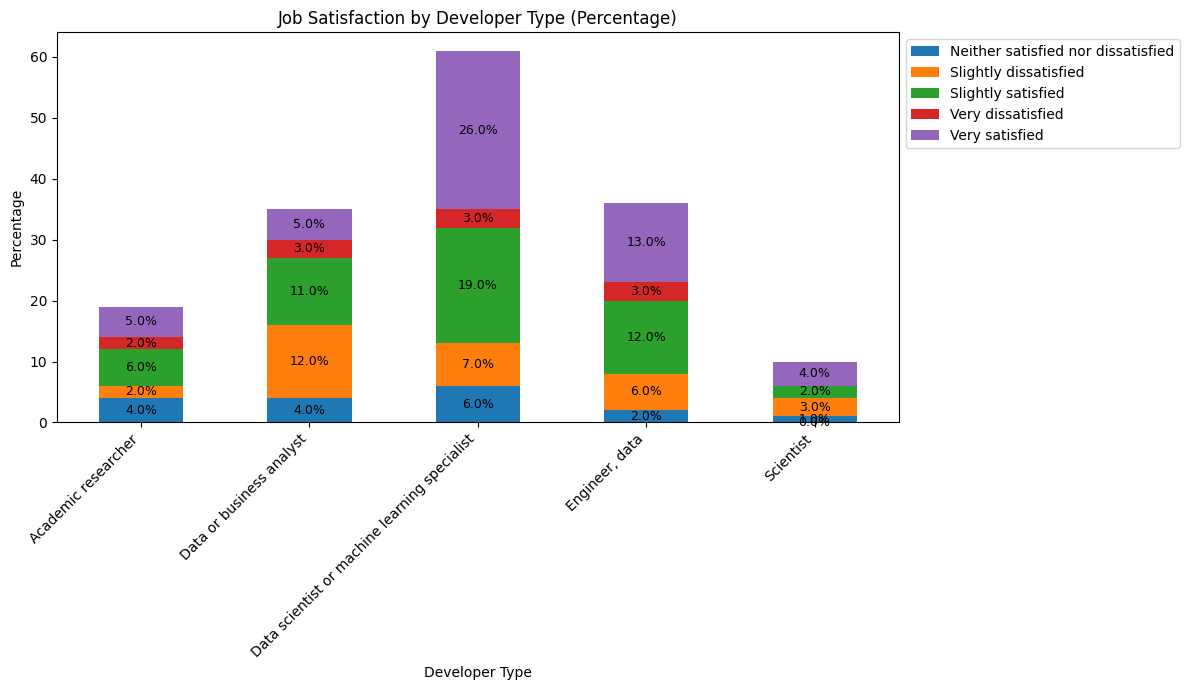

In [12]:
# Job Satisfaction by Developer Type
df_job_related_pandas = df_job_related.groupBy("DevType", "JobSat").count().toPandas()
df_pivot = df_job_related_pandas.pivot(index='DevType', columns='JobSat', values='count')

# Normalize the counts to percentage
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Job Satisfaction by Developer Type (Percentage)
ax = df_job_related.groupBy("DevType", "JobSat").count().toPandas().pivot(index='DevType', columns='JobSat', values='count').plot(kind='bar', stacked=True, figsize=(12,7))

# Adding percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # X position of the label
    y = p.get_y() + height / 2  # Y position of the label
    ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding labels and title
plt.title('Job Satisfaction by Developer Type (Percentage)')
plt.xlabel('Developer Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


##### Analysis of Job Satisfaction:

1. **Academic Researcher**:

   * Very low satisfaction levels with **5% very satisfied** and a slightly higher **6% neither satisfied nor dissatisfied**.
   * **6% are slightly satisfied** and **2% slightly dissatisfied**, showing mixed but relatively low satisfaction.

2. **Data or Business Analyst**:

   * **Slightly satisfied** (12%) is the highest, indicating this role has the most neutral or moderately positive feedback.
   * There's **5% very satisfied**, **4% neither satisfied nor dissatisfied**, and **2% dissatisfied**.

3. **Data Scientist or Machine Learning Specialist**:

   * A strong **19% very satisfied** and **7% slightly satisfied**, showing that these roles are highly satisfied.
   * Small **6% neither satisfied nor dissatisfied**, and only **3% very dissatisfied**.

4. **Engineer/Data**:

   * **13% very satisfied** with another **12% slightly satisfied**.
   * **6% neither satisfied nor dissatisfied** and **6% slightly dissatisfied** suggest a healthy satisfaction with a small percentage of dissatisfaction.

5. **Scientist**:

   * A very low **4% very satisfied** and **3% slightly satisfied**.
   * Larger portion of **neither satisfied nor dissatisfied** (8%) and **2% slightly dissatisfied**, indicating generally neutral or low satisfaction.

##### Insights:

* **Data Science and Engineering roles** have high job satisfaction, especially **Data Scientist/Machine Learning Specialist** and **Engineer/Data**.
* **Academic Researcher** and **Scientist** roles appear to have lower satisfaction levels, with many respondents feeling neutral or dissatisfied.

##### Conclusion:

The data shows that roles in data science and engineering are associated with higher job satisfaction, while academic and scientific roles tend to be less satisfied or more neutral.


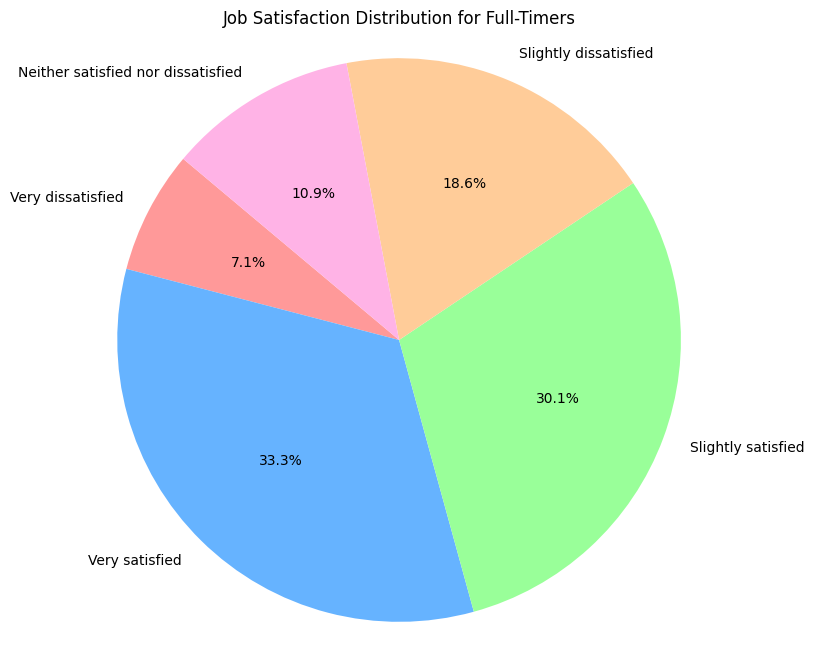

In [13]:
# Filter the dataset for full-time employment
full_time_data = df_job_related.filter(df_job_related['Employment'] == 'Employed full-time')

# Group by JobSat and count occurrences for full-time only
full_time_counts = full_time_data.groupBy("JobSat").count().toPandas()

# Plotting pie chart for full-time job satisfaction
plt.figure(figsize=(8, 8))
plt.pie(full_time_counts['count'], labels=full_time_counts['JobSat'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6'])
plt.title('Job Satisfaction Distribution for Full-Timers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

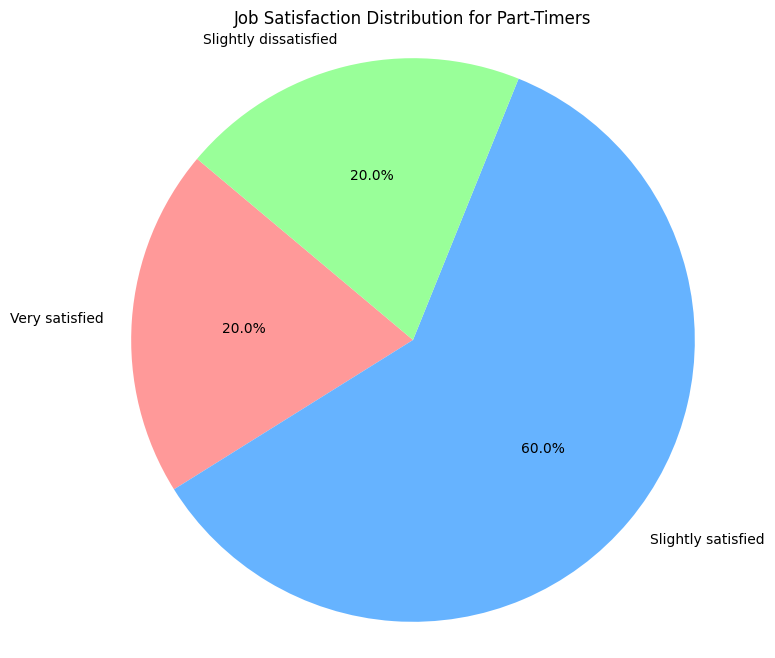

In [14]:
# Filter the dataset for full-time employment
full_time_data = df_job_related.filter(df_job_related['Employment'] == 'Employed part-time')

# Group by JobSat and count occurrences for full-time only
full_time_counts = full_time_data.groupBy("JobSat").count().toPandas()

# Plotting pie chart for full-time job satisfaction
plt.figure(figsize=(8, 8))
plt.pie(full_time_counts['count'], labels=full_time_counts['JobSat'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6'])
plt.title('Job Satisfaction Distribution for Part-Timers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
jobfactor_counts = (
    df_job_related.select(explode(split(col("JobFactors"), ";")).alias("JobFactor"))
      .withColumn("JobFactor", trim(col("JobFactor")))
      .filter(col("JobFactor").isNotNull() & (col("JobFactor") != ""))
      .groupBy("JobFactor")
      .count()
      .orderBy(col("count").desc())
)

jobfactor_counts.show(truncate=False)

+----------------------------------------------------------------------+-----+
|JobFactor                                                             |count|
+----------------------------------------------------------------------+-----+
|Office environment or company culture                                 |86   |
|Opportunities for professional development                            |76   |
|Languages, frameworks, and other technologies I'd be working with     |66   |
|Flex time or a flexible schedule                                      |65   |
|Industry that I'd be working in                                       |38   |
|Specific department or team I'd be working on                         |37   |
|How widely used or impactful my work output would be                  |36   |
|Remote work options                                                   |35   |
|Financial performance or funding status of the company or organization|24   |
|Diversity of the company or organization           

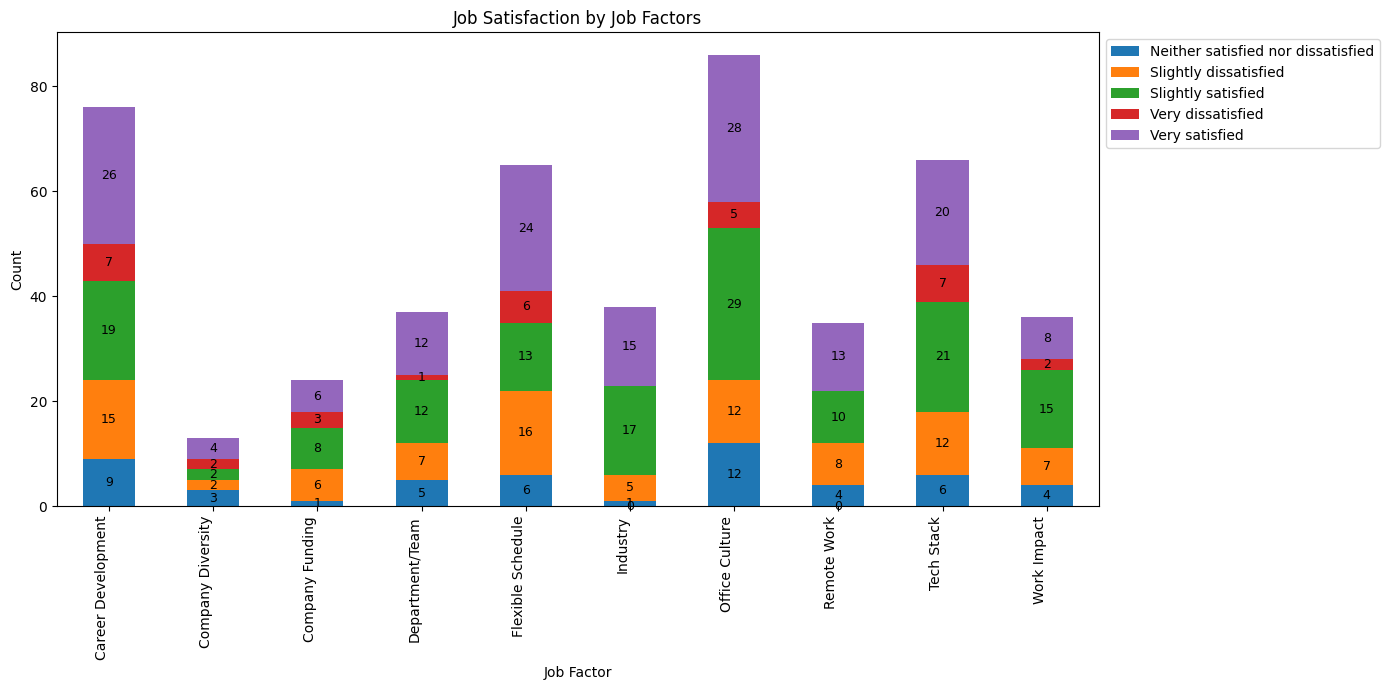

In [16]:
# Simplified job factor labels
simplified_jobfactor = {
    'Office environment or company culture': 'Office Culture',
    'Opportunities for professional development': 'Career Development',
    'Languages, frameworks, and other technologies I\'d be working with': 'Tech Stack',
    'Flex time or a flexible schedule': 'Flexible Schedule',
    'Industry that I\'d be working in': 'Industry',
    'Specific department or team I\'d be working on': 'Department/Team',
    'How widely used or impactful my work output would be': 'Work Impact',
    'Remote work options': 'Remote Work',
    'Financial performance or funding status of the company or organization': 'Company Funding',
    'Diversity of the company or organization': 'Company Diversity'
}

# Group by JobFactor and JobSat, and get the count
jobfactor_jobSat_counts = (
    df_job_related
    .select(explode(split(col("JobFactors"), ";")).alias("JobFactor"), "JobSat")
    .withColumn("JobFactor", trim(col("JobFactor")))
    .filter(col("JobFactor").isNotNull() & (col("JobFactor") != ""))
    .groupBy("JobFactor", "JobSat")
    .count()
    .toPandas()
)

# Replace original labels with simplified ones
jobfactor_jobSat_counts['JobFactor'] = jobfactor_jobSat_counts['JobFactor'].replace(simplified_jobfactor)

# Pivot the data for easy plotting
jobfactor_pivot = jobfactor_jobSat_counts.pivot_table(index='JobFactor', columns='JobSat', values='count', fill_value=0)

# Plot the stacked bar chart
ax = jobfactor_pivot.plot(kind='bar', stacked=True, figsize=(14,7))

# Add values on top of the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # X position of the label
    y = p.get_y() + height / 2  # Y position of the label
    ax.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=9, color='black')  # Convert to int

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding labels and title
plt.title('Job Satisfaction by Job Factors')
plt.xlabel('Job Factor')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

##### Job Factors Breakdown:

1. **Career Development**:

   * **High satisfaction**: Strongly dominated by "Very Satisfied" (26) and "Slightly Satisfied" (19).
   * **Low dissatisfaction**: Only 7 people are "Very Dissatisfied," indicating this is an important factor for job satisfaction.

2. **Company Diversity**:

   * **Mostly satisfied**: A mix of "Slightly Satisfied" (15) and "Very Satisfied" (24), indicating that diversity is valued.
   * **Slight dissatisfaction**: There is a smaller portion of "Slightly Dissatisfied" (6), but overall, it leans towards positive views.

3. **Company Funding**:

   * **Slightly positive**: Many individuals seem neutral or "Slightly Satisfied" (6), with a smaller group of "Very Satisfied" (3).
   * **Minimal dissatisfaction**: Only 2 "Very Dissatisfied" responses, showing some concern but not a major issue.

4. **Department/Team**:

   * **Generally positive**: The majority responses are positive with "Slightly Satisfied" (12) and "Very Satisfied" (15), though there is also a mix of neutral responses.

5. **Flexible Schedule**:

   * **High satisfaction**: Dominated by "Very Satisfied" (24), with "Slightly Satisfied" (19) contributing to a positive overall score.
   * **Dissatisfaction is low**: Only a small proportion is dissatisfied (7).

6. **Industry**:

   * **Strong satisfaction**: The dominant satisfaction level here is "Slightly Satisfied" (24) and "Very Satisfied" (17).
   * **Minimal dissatisfaction**: Only 6 responses were dissatisfied, showing generally positive views about the industry.

7. **Office Culture**:

   * **Very positive**: The highest levels of satisfaction with 29 "Very Satisfied" responses.
   * **Neutral and slightly dissatisfied**: A small proportion are either neutral (12) or "Slightly Dissatisfied" (12), but overall the culture seems to be appreciated.

8. **Remote Work**:

   * **Moderately positive**: There is a fairly balanced distribution, but "Very Satisfied" (20) and "Slightly Satisfied" (21) are the dominant satisfaction levels.
   * **Low dissatisfaction**: Only 7 responses marked as "Very Dissatisfied."

9. **Tech Stack**:

   * **Slight satisfaction**: A balanced distribution, with 20 "Very Satisfied" responses and 7 "Very Dissatisfied" ones.
   * **More satisfied than dissatisfied**: The dissatisfaction here is relatively low, with a stronger leaning towards satisfaction.

10. **Work Impact**:

    * **Moderate satisfaction**: With 15 "Slightly Satisfied" and 8 "Very Satisfied" responses, most employees appear content with their impact at work.
    * **Dissatisfaction present**: There is a noticeable proportion of "Very Dissatisfied" (7) responses.

##### Overall Insights:

* **Most positive factors**: Career development, office culture, and remote work are the most positively received, with high proportions of "Very Satisfied" responses.
* **Areas of concern**: Industry and work impact show slight dissatisfaction, but the numbers are still relatively low.
* **Neutral sentiment**: There is a fair portion of neutral responses across most factors, especially around flexibility and company diversity.

##### Conclusion:

This chart gives us a clear sense of what factors influence employee satisfaction, with the strongest satisfaction seen in career development and office culture. However, some concerns around the tech stack and work impact may require attention to improve overall satisfaction further.


### **Salary**

In [17]:
df_salary.show(truncate=False)

df_salary.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_salary.columns]).show()

+-------------+--------+------------------+----------------------------------+
|ConvertedComp|CompFreq|Country           |JobSat                            |
+-------------+--------+------------------+----------------------------------+
|160000       |Yearly  |United States     |Very satisfied                    |
|7080         |Monthly |Mauritius         |Very dissatisfied                 |
|22915        |Yearly  |Spain             |Neither satisfied nor dissatisfied|
|90000        |Yearly  |United States     |Slightly satisfied                |
|27504        |Monthly |Russian Federation|Slightly satisfied                |
|40000        |Yearly  |United States     |Slightly dissatisfied             |
|71758        |Yearly  |Canada            |Slightly satisfied                |
|NULL         |NULL    |United States     |Slightly dissatisfied             |
|156000       |Yearly  |United States     |Slightly satisfied                |
|76994        |Yearly  |Spain             |Slightly 

In [18]:
df_salary = df_salary.filter(df_salary["ConvertedComp"].isNotNull() & df_salary["CompFreq"].isNotNull())
df_salary.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_salary.columns]).show()

+-------------+--------+-------+------+
|ConvertedComp|CompFreq|Country|JobSat|
+-------------+--------+-------+------+
|            0|       0|      0|     0|
+-------------+--------+-------+------+



In [19]:
# Convert ConvertedComp to monthly if CompFreq is 'Yearly'
df_salary = df_salary.withColumn(
    "CompTotalMonthly",
    round(
        when(col("CompFreq") == "Yearly", col("ConvertedComp").cast("double") / 12)
        .otherwise(col("ConvertedComp").cast("double")),
        2
    )
)

df_salary.show(10)

+-------------+--------+------------------+--------------------+----------------+
|ConvertedComp|CompFreq|           Country|              JobSat|CompTotalMonthly|
+-------------+--------+------------------+--------------------+----------------+
|       160000|  Yearly|     United States|      Very satisfied|        13333.33|
|         7080| Monthly|         Mauritius|   Very dissatisfied|          7080.0|
|        22915|  Yearly|             Spain|Neither satisfied...|         1909.58|
|        90000|  Yearly|     United States|  Slightly satisfied|          7500.0|
|        27504| Monthly|Russian Federation|  Slightly satisfied|         27504.0|
|        40000|  Yearly|     United States|Slightly dissatis...|         3333.33|
|        71758|  Yearly|            Canada|  Slightly satisfied|         5979.83|
|       156000|  Yearly|     United States|  Slightly satisfied|         13000.0|
|        76994|  Yearly|             Spain|  Slightly satisfied|         6416.17|
|       120000| 

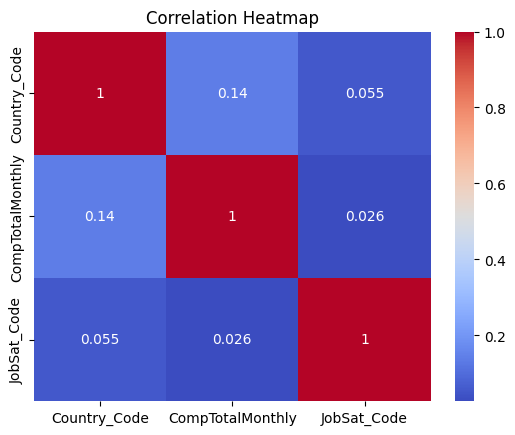

In [20]:
import seaborn as sns

# Convert PySpark DataFrame to pandas DataFrame for correlation analysis
df_salary_pd = df_salary.toPandas()

# Encode categorical columns
df_salary_pd['Country_Code'] = df_salary_pd['Country'].astype('category').cat.codes
df_salary_pd['JobSat_Code'] = df_salary_pd['JobSat'].astype('category').cat.codes

# Compute correlation
corr = df_salary_pd[['Country_Code', 'CompTotalMonthly', 'JobSat_Code']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

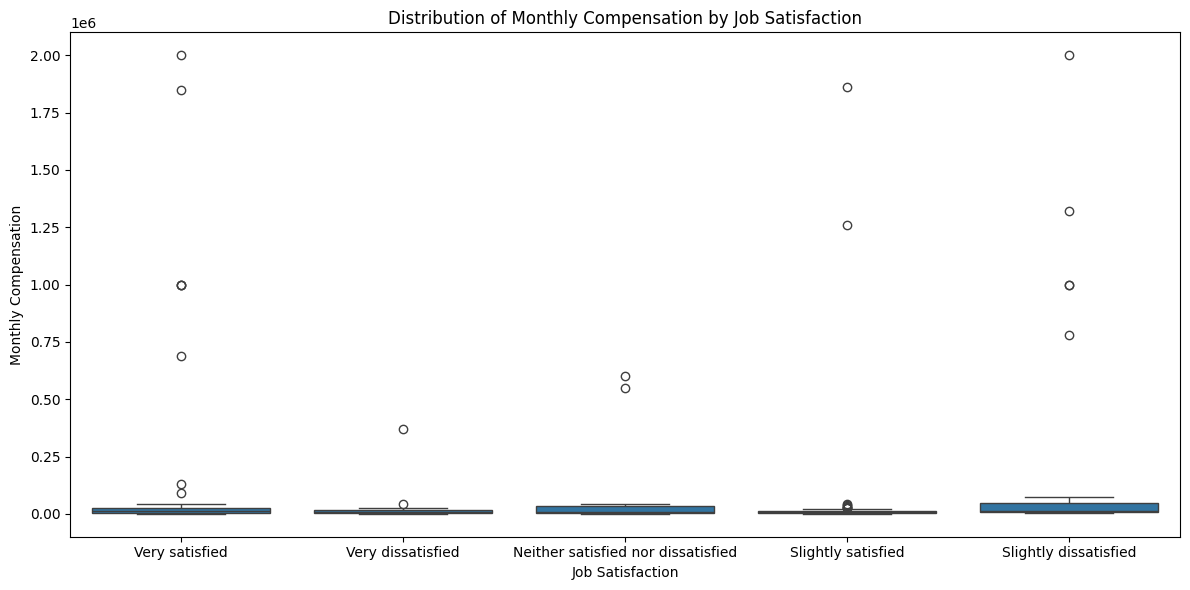

In [21]:
# Create a boxplot to show the distribution of compensation by job satisfaction level
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSat', y='CompTotalMonthly', data=df_salary_pd)

# Adding labels and title
plt.title('Distribution of Monthly Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Compensation')
plt.tight_layout()

# Show the plot
plt.show()

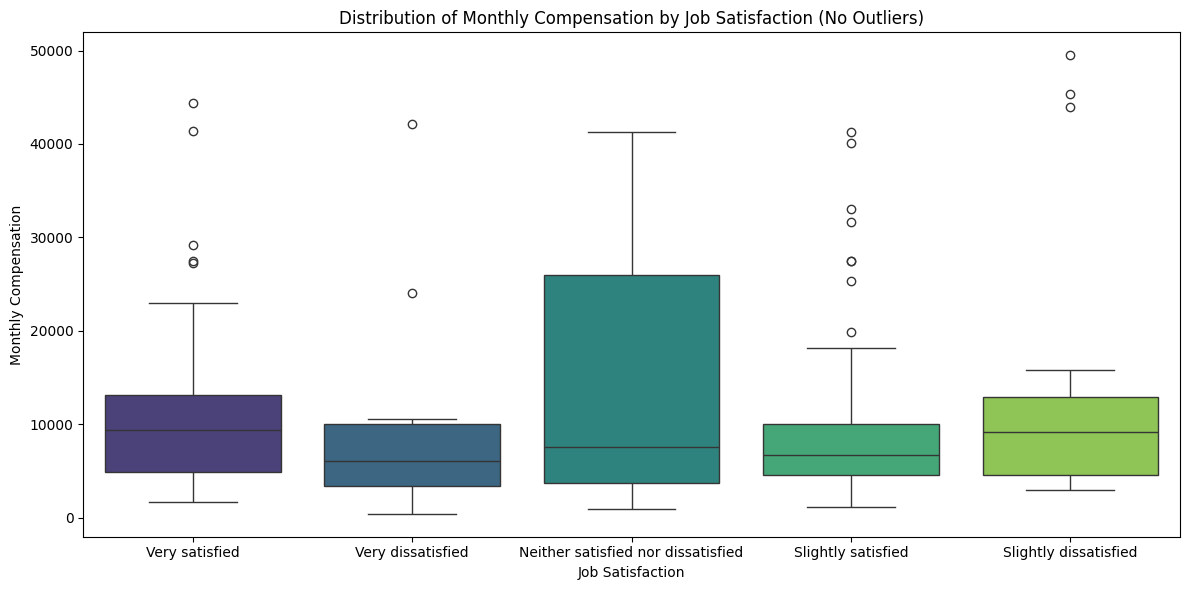

In [22]:
# Calculate the IQR for the `CompTotalMonthly` column
Q1 = df_salary_pd['CompTotalMonthly'].quantile(0.25)
Q3 = df_salary_pd['CompTotalMonthly'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_salary_filtered = df_salary_pd[(df_salary_pd['CompTotalMonthly'] >= lower_bound) & (df_salary_pd['CompTotalMonthly'] <= upper_bound)]

# Create the boxplot with the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSat', y='CompTotalMonthly', data=df_salary_filtered, palette='viridis', hue='JobSat')

# Adding labels and title
plt.title('Distribution of Monthly Compensation by Job Satisfaction (No Outliers)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Compensation')
plt.tight_layout()

# Show the plot
plt.show()

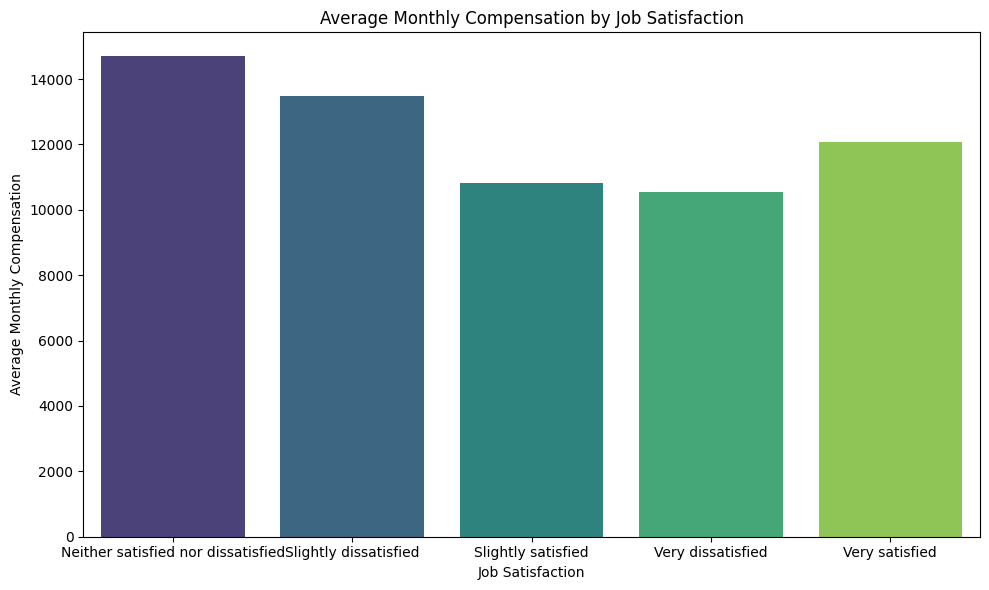

In [23]:
# Group by JobSat, then calculate the mean compensation
df_grouped = df_salary_filtered.groupby('JobSat')['CompTotalMonthly'].mean().reset_index()

# Bar plot to show average compensation by job satisfaction
plt.figure(figsize=(10, 6))
sns.barplot(x='JobSat', y='CompTotalMonthly', data=df_grouped, palette='viridis', hue='JobSat')

# Adding labels and title
plt.title('Average Monthly Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Average Monthly Compensation')
plt.tight_layout()

# Show the plot
plt.show()

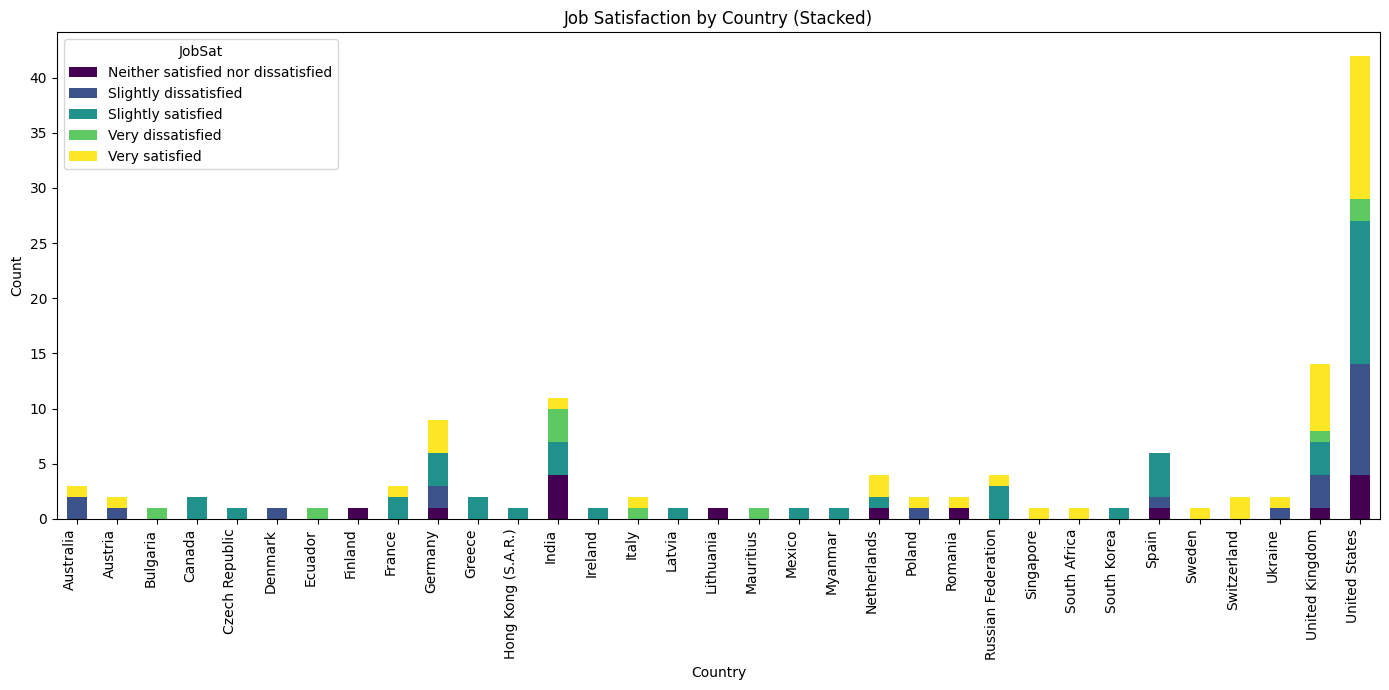

In [24]:
# Group by Country and JobSat, then get the count for each combination
df_grouped = df_salary_filtered.groupby(['Country', 'JobSat']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(14,7), colormap='viridis')

# Adding labels and title
plt.title('Job Satisfaction by Country (Stacked)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

##### 1. **Boxplot (With Outliers)**

* The first boxplot shows **monthly compensation** across **job satisfaction levels**.
* **Outliers**: There are noticeable outliers for all job satisfaction levels, particularly for **"Very Satisfied"**, where monthly compensation spikes significantly, likely indicating a few respondents with very high compensation.
* **Insight**: This indicates that a small number of respondents in the "Very Satisfied" group are compensated significantly higher than the majority.

##### 2. **Boxplot (Without Outliers)**

* The second boxplot removes extreme outliers, focusing on the main distribution of monthly compensation across job satisfaction levels.
* **Distribution**: The boxplots show that **"Neither satisfied nor dissatisfied"** has the highest range of compensation, followed by **"Slightly Dissatisfied"** and **"Slightly Satisfied"**.
* **Trend**: As expected, job satisfaction tends to correlate with lower compensation, with **"Very Satisfied"** showing the smallest variation in compensation.

##### 3. **Average Monthly Compensation by Job Satisfaction**

* The third bar chart shows the **average monthly compensation** for each job satisfaction level.
* **Key observation**: The average compensation is the highest for **"Neither satisfied nor dissatisfied"**, followed by **"Slightly Dissatisfied"**. Interestingly, **"Very Satisfied"** employees have slightly lower average compensation than the "Slightly Satisfied" group.
* **Insight**: This could indicate that employees with high compensation may not always feel "Very Satisfied" or that salary doesn’t necessarily equate to job satisfaction in some cases.

##### 4. **Stacked Bar Chart (Job Satisfaction by Country)**

* The fourth stacked bar chart visualizes **job satisfaction distribution across countries**.
* **Key observation**: The **United States** and **United Kingdom** have the largest counts of job satisfaction responses, with a high proportion of "Very Satisfied" employees.
* **Diversity of job satisfaction**: Countries like **India** and **South Korea** show a greater diversity in satisfaction levels (ranging from "Very Satisfied" to "Very Dissatisfied").

##### Conclusion:

1. **Job Satisfaction & Compensation**: There seems to be no clear correlation between job satisfaction and compensation across the groups. **"Neither satisfied nor dissatisfied"** employees appear to have the highest average compensation.
2. **Country-Specific Insights**: Countries like the **United States** and **United Kingdom** have high job satisfaction levels, whereas other countries show more variation.
3. **Removing Outliers**: The removal of outliers makes the overall distribution clearer, especially for countries with extreme compensation ranges.

These visualizations provide a deeper understanding of how job satisfaction and compensation correlate and differ across countries. The large number of outliers highlights the impact of high-compensation roles, while the adjusted boxplot emphasizes the central tendencies.


### **Environment**

In [25]:
df_environment.show(truncate=False)

df_environment.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_environment.columns]).show()

+----------+-------------------------------------------------+----------------------------------------------+-----------+--------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------+----------------------------------+
|Dependents|WorkRemote                                       |WorkLoc                                       |WorkWeekHrs|WorkPlan                                                                                    |WorkChallenge                                                                                            |JobSat                            |
+----------+-------------------------------------------------+----------------------------------------------+-----------+--------------------------------------------------------------------------------------------+--------------------------------------------------------------------------

In [26]:
df_environment = df_environment.filter(df_environment["Dependents"].isNotNull() & df_environment["WorkWeekHrs"].isNotNull() & df_environment["WorkPlan"].isNotNull() & df_environment["WorkChallenge"].isNotNull())
df_environment.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_environment.columns]).show()

+----------+----------+-------+-----------+--------+-------------+------+
|Dependents|WorkRemote|WorkLoc|WorkWeekHrs|WorkPlan|WorkChallenge|JobSat|
+----------+----------+-------+-----------+--------+-------------+------+
|         0|         0|      0|          0|       0|            0|     0|
+----------+----------+-------+-----------+--------+-------------+------+



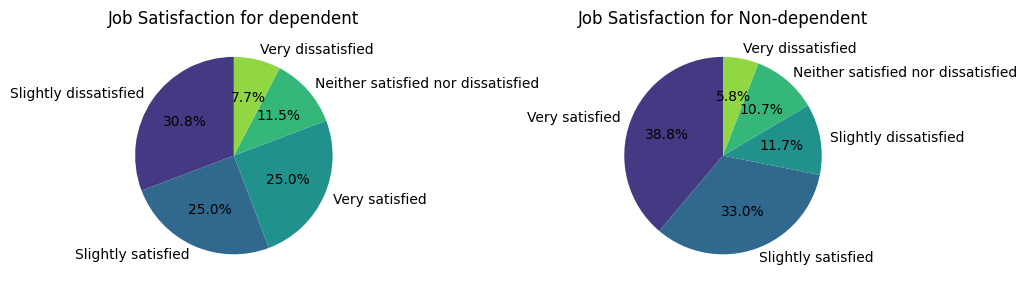

In [27]:
df_environment_pd = df_environment.toPandas()

# Pie chart for Dependents = 'Yes'
df_dependent_yes = df_environment_pd[df_environment_pd['Dependents'] == 'Yes']
job_sat_yes = df_dependent_yes['JobSat'].value_counts()

# Pie chart for Dependents = 'No'
df_dependent_no = df_environment_pd[df_environment_pd['Dependents'] == 'No']
job_sat_no = df_dependent_no['JobSat'].value_counts()

# Plotting the pie chart for Dependents = 'Yes'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(job_sat_yes, labels=job_sat_yes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(job_sat_yes)))
plt.title('Job Satisfaction for dependent')

# Plotting the pie chart for Dependents = 'No'
plt.subplot(1, 2, 2)
plt.pie(job_sat_no, labels=job_sat_no.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(job_sat_no)))
plt.title('Job Satisfaction for Non-dependent')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
df_environment.groupBy("WorkRemote").count().show(truncate=False)

+-------------------------------------------------------+-----+
|WorkRemote                                             |count|
+-------------------------------------------------------+-----+
|A few days each month                                  |51   |
|Less than once per month / Never                       |61   |
|All or almost all the time (I'm full-time remote)      |10   |
|About half the time                                    |3    |
|Less than half the time, but at least one day each week|18   |
|More than half, but not all, the time                  |4    |
|It's complicated                                       |8    |
+-------------------------------------------------------+-----+



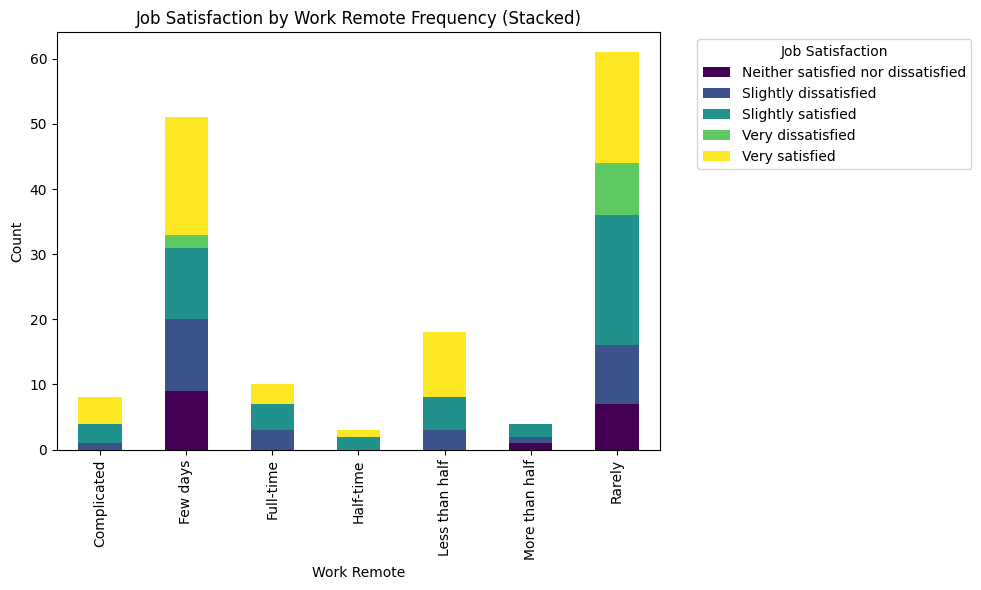

In [29]:
# Simplify the WorkRemote column values
df_environment = df_environment.withColumn(
    "WorkRemote",
    when(col("WorkRemote") == "A few days each month", "Few days")
    .when(col("WorkRemote") == "Less than once per month / Never", "Rarely")
    .when(col("WorkRemote") == "All or almost all the time (I'm full-time remote)", "Full-time")
    .when(col("WorkRemote") == "About half the time", "Half-time")
    .when(col("WorkRemote") == "Less than half the time, but at least one day each week", "Less than half")
    .when(col("WorkRemote") == "More than half, but not all, the time", "More than half")
    .when(col("WorkRemote") == "It's complicated", "Complicated")
    .otherwise(col("WorkRemote"))
)

df_environment_pd = df_environment.toPandas()

df_pivot = df_environment_pd.groupby(['WorkRemote', 'JobSat']).size().unstack(fill_value=0)

df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Job Satisfaction by Work Remote Frequency (Stacked)')
plt.xlabel('Work Remote')
plt.ylabel('Count')

plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [30]:
df_environment.groupBy("WorkLoc").count().show(truncate=False)

+----------------------------------------------+-----+
|WorkLoc                                       |count|
+----------------------------------------------+-----+
|Home                                          |41   |
|Other place, such as a coworking space or cafe|14   |
|Office                                        |100  |
+----------------------------------------------+-----+



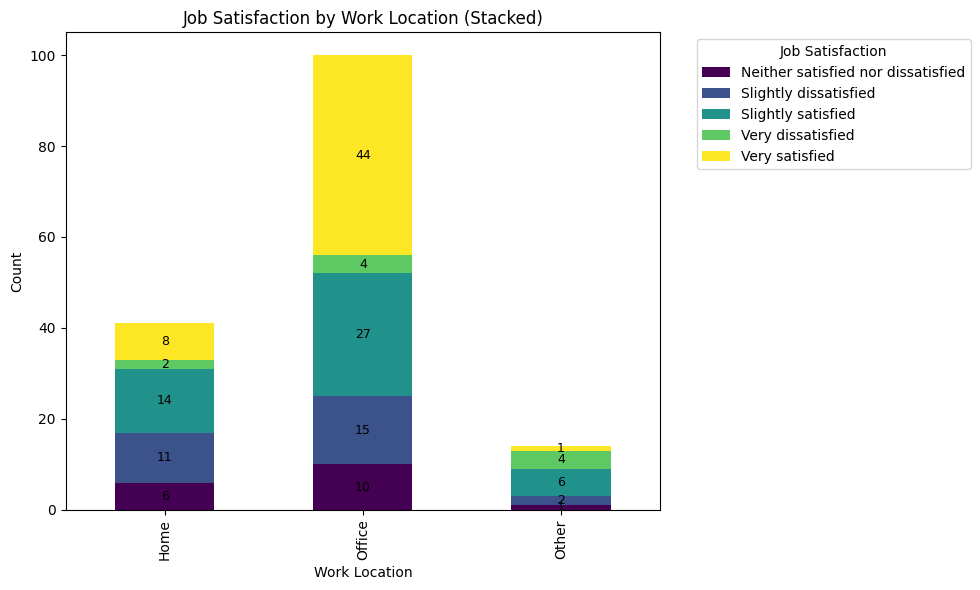

In [31]:
df_environment = df_environment.withColumn(
    "WorkLoc",
    when(col("WorkLoc") == "Other place, such as a coworking space or cafe", "Other")
        .otherwise(col("WorkLoc"))
)
df_environment_pd = df_environment.toPandas()

df_pivot = df_environment_pd.groupby(['WorkLoc', 'JobSat']).size().unstack(fill_value=0)

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Job Satisfaction by Work Location (Stacked)')
plt.xlabel('Work Location')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        width = p.get_width()
        x = p.get_x() + width / 2  # X position of the label
        y = p.get_y() + height / 2  # Y position of the label
        ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=9, color='black')

plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

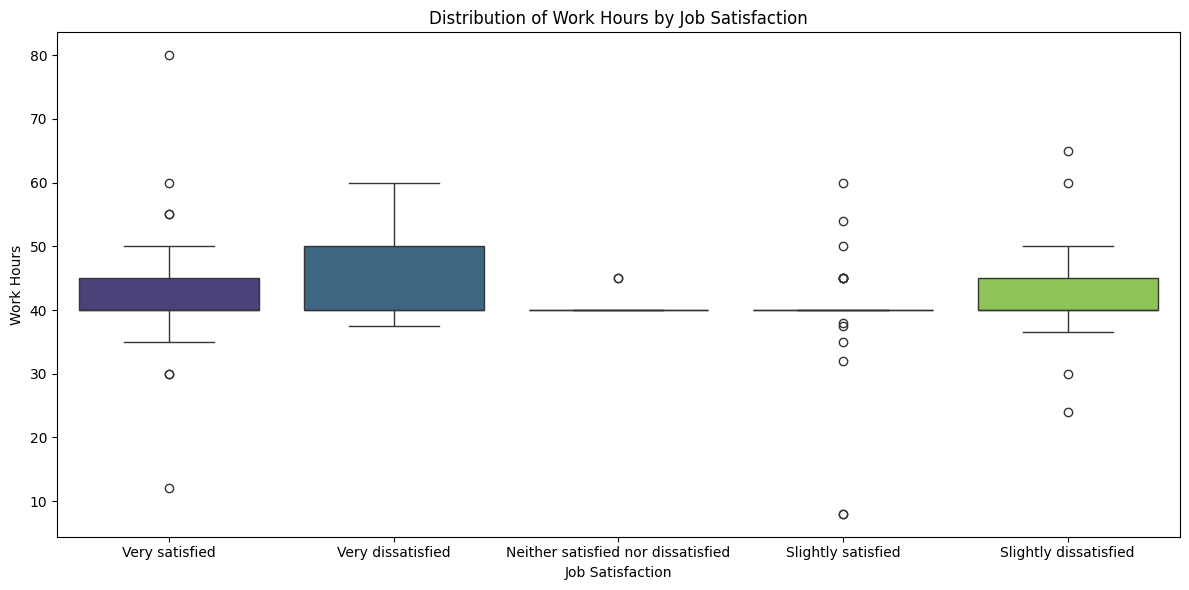

In [32]:
# Box plot to show the distribution of work hours by job satisfaction level
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSat', y='WorkWeekHrs', data=df_environment_pd, palette='viridis', hue='JobSat')

# Adding labels and title
plt.title('Distribution of Work Hours by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Work Hours')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21664\1348730521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobSat', y='WorkWeekHrs', data=df_mean_workhours, palette='viridis')


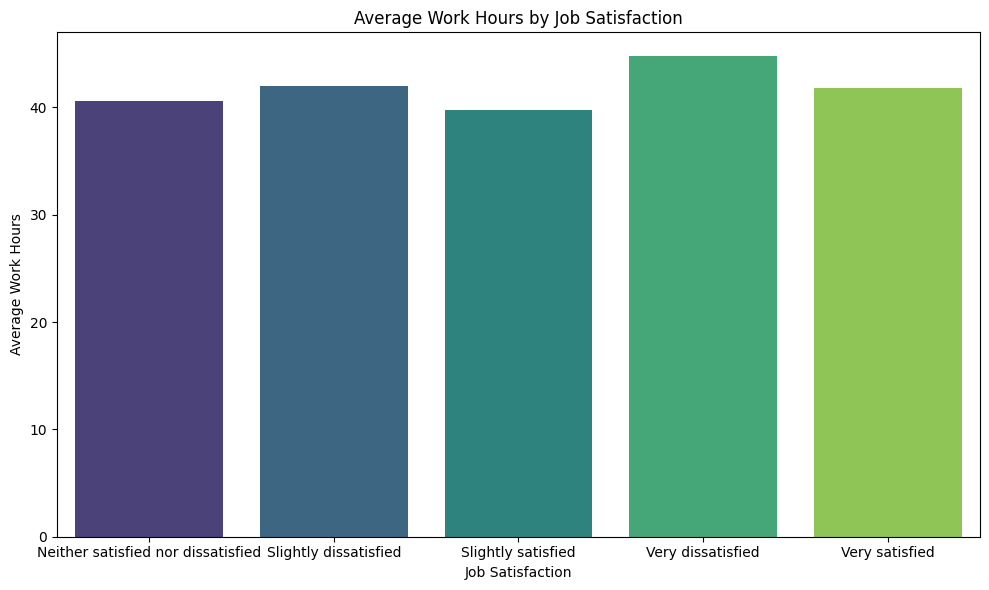

In [33]:
# Group by JobSat and calculate the mean of WorkWeekHrs
df_mean_workhours = df_environment_pd.groupby('JobSat')['WorkWeekHrs'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='JobSat', y='WorkWeekHrs', data=df_mean_workhours, palette='viridis')

# Adding labels and title
plt.title('Average Work Hours by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Average Work Hours')

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
df_environment_workplan = df_environment.withColumn(
    "WorkPlan", 
    split(col("WorkPlan"), ";")) \
        .withColumn("WorkPlan", explode(col("WorkPlan"))) \
        .withColumn("WorkPlan", trim(col("WorkPlan"))
        )

df_environment_workplan.groupBy("WorkPlan").count().show(truncate=False)

+--------------------------------------------------------------------------------------------+-----+
|WorkPlan                                                                                    |count|
+--------------------------------------------------------------------------------------------+-----+
|There's no schedule or spec                                                                 |56   |
|There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns |79   |
|There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely|20   |
|I work on what seems most important or urgent                                               |56   |
+--------------------------------------------------------------------------------------------+-----+



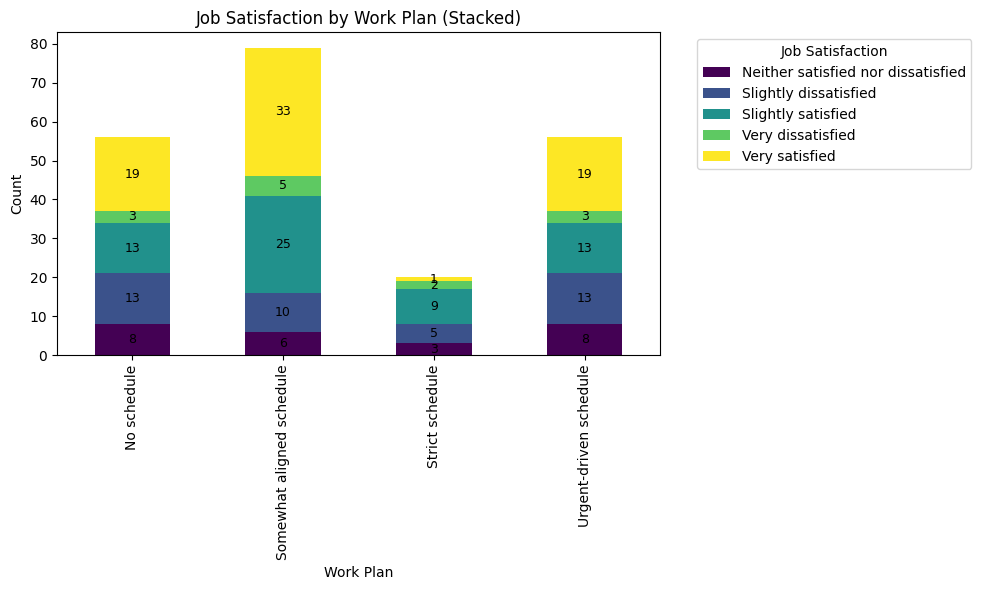

In [35]:
df_environment_workplan = df_environment_workplan.withColumn(
    "WorkPlan",
    when(col("WorkPlan") == "There's no schedule or spec", "No schedule")
    .when(col("WorkPlan") == "There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns", "Somewhat aligned schedule")
    .when(col("WorkPlan") == "There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely", "Strict schedule")
    .when(col("WorkPlan") == "I work on what seems most important or urgent", "Urgent-driven schedule")
    .otherwise(col("WorkPlan"))
)
df_environment_workplan_pd = df_environment_workplan.toPandas()

df_pivot = df_environment_workplan_pd.groupby(['WorkPlan', 'JobSat']).size().unstack(fill_value=0)

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        width = p.get_width()
        x = p.get_x() + width / 2  # X position of the label
        y = p.get_y() + height / 2  # Y position of the label
        ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=9, color='black')

plt.title('Job Satisfaction by Work Plan (Stacked)')
plt.xlabel('Work Plan')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
df_environment_WorkChallenge = df_environment.withColumn(
    "WorkChallenge", 
    split(col("WorkChallenge"), ";")) \
        .withColumn("WorkChallenge", explode(col("WorkChallenge"))) \
        .withColumn("WorkChallenge", trim(col("WorkChallenge"))
        )

df_environment_WorkChallenge.groupBy("WorkChallenge").count().show(truncate=False)

+------------------------------------------------------------+-----+
|WorkChallenge                                               |count|
+------------------------------------------------------------+-----+
|Distracting work environment                                |55   |
|Time spent commuting                                        |30   |
|Toxic work environment                                      |27   |
|Inadequate access to necessary tools                        |46   |
|Being tasked with non-development work                      |54   |
|Non-work commitments (parenting, school work, hobbies, etc.)|23   |
|Lack of support from management                             |47   |
|Not enough people for the workload                          |55   |
|Meetings                                                    |57   |
+------------------------------------------------------------+-----+



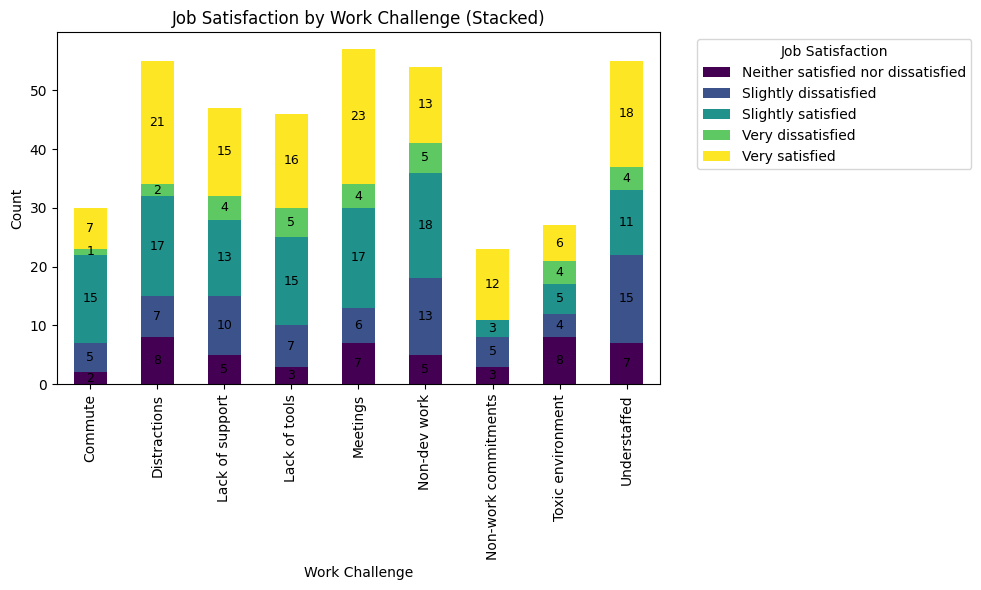

In [39]:
df_environment_WorkChallenge = df_environment_WorkChallenge.withColumn(
    "WorkChallenge",
    when(col("WorkChallenge") == "Distracting work environment", "Distractions")
    .when(col("WorkChallenge") == "Time spent commuting", "Commute")
    .when(col("WorkChallenge") == "Toxic work environment", "Toxic environment")
    .when(col("WorkChallenge") == "Inadequate access to necessary tools", "Lack of tools")
    .when(col("WorkChallenge") == "Being tasked with non-development work", "Non-dev work")
    .when(col("WorkChallenge") == "Non-work commitments (parenting, school work, hobbies, etc.)", "Non-work commitments")
    .when(col("WorkChallenge") == "Lack of support from management", "Lack of support")
    .when(col("WorkChallenge") == "Not enough people for the workload", "Understaffed")
    .otherwise(col("WorkChallenge"))
)
df_environment_WorkChallenge_pd = df_environment_WorkChallenge.toPandas()

df_pivot = df_environment_WorkChallenge_pd.groupby(['WorkChallenge', 'JobSat']).size().unstack(fill_value=0)

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        width = p.get_width()
        x = p.get_x() + width / 2  # X position of the label
        y = p.get_y() + height / 2  # Y position of the label
        ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=9, color='black')

plt.title('Job Satisfaction by Work Challenge (Stacked)')
plt.xlabel('Work Challenge')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 🟢 **Work Challenge vs JobSat**

* **Top 3 challenges linked to high satisfaction (Very Satisfied):**
  ► Meetings
  ► Distractions
  ► Understaffed

* **Top 3 challenges linked to dissatisfaction (Very Dissatisfied + Slightly Dissatisfied):**
  ► Toxic environment
  ► Non-dev work
  ► Lack of support

🔍 **Insight**: Even common issues like meetings or distractions can coexist with job satisfaction, suggesting perception or role type matters more than presence of the challenge.

---

##### 🟡 **Work Plan vs JobSat**

* **Strict schedule** shows **lower satisfaction**, possibly due to rigidity.
* **Somewhat aligned** and **urgent-driven** schedules have **higher satisfaction** rates.

🔍 **Insight**: Workers thrive in environments with some autonomy—rigid plans might limit creative or personal flow.

---

##### 🔵 **Work Location vs JobSat**

* **Office** dominates for Very Satisfied.
* **Home** has decent balance.
* **Other** (e.g., coworking cafes) has least satisfaction overall.

🔍 **Insight**: Stability of traditional office setups may contribute to higher satisfaction, or reflect more resourced employers.

---

##### 🔴 **Work Remote vs JobSat**

* **Few days/month** and **Rarely** remote show high satisfaction clusters.
* Fully remote is neutral or lower on JobSat.

🔍 **Insight**: A blend (hybrid) might strike the right balance—total remote may isolate or blur boundaries.

---

##### 🟣 **Dependents vs JobSat**

* **With dependents**: higher Slightly Dissatisfied, lower Very Satisfied.
* **No dependents**: highest Very Satisfied (38.8%).

🔍 **Insight**: Family responsibilities may impact emotional and time resources, slightly pulling down satisfaction levels.

---

##### 🔥 **Overall Conclusion**:

► **Autonomy**, **hybrid flexibility**, and **supportive culture** boost satisfaction.
► **Toxicity**, **non-core tasks**, and **rigid systems** drag it down.
► **Personal context** (like having dependents) also nudges satisfaction.


### **Management**

In [40]:
df_management.show(truncate=False)

df_management.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_management.columns]).show()

+--------------------+--------+--------+----------------------------------+
|MgrIdiot            |MgrMoney|MgrWant |JobSat                            |
+--------------------+--------+--------+----------------------------------+
|Very confident      |Not sure|Not sure|Very satisfied                    |
|Not at all confident|No      |No      |Very dissatisfied                 |
|Not at all confident|Yes     |Yes     |Neither satisfied nor dissatisfied|
|Very confident      |Yes     |Not sure|Slightly satisfied                |
|Not at all confident|No      |No      |Slightly satisfied                |
|Not at all confident|No      |Not sure|Slightly dissatisfied             |
|Very confident      |No      |No      |Slightly satisfied                |
|Not at all confident|Yes     |Yes     |Slightly dissatisfied             |
|Somewhat confident  |No      |No      |Slightly satisfied                |
|Very confident      |Not sure|Not sure|Slightly satisfied                |
|Somewhat co

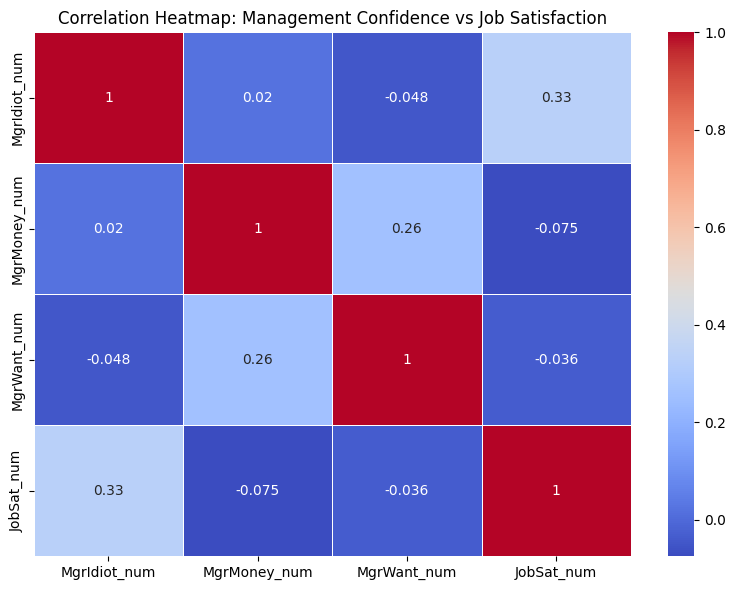

In [42]:
# Step 1: Encode all categorical values
df_encoded = df_management \
    .withColumn("MgrIdiot_num", when(col("MgrIdiot") == "Very confident", 2)
                                  .when(col("MgrIdiot") == "Somewhat confident", 1)
                                  .otherwise(0)) \
    .withColumn("MgrMoney_num", when(col("MgrMoney") == "Yes", 2)
                                  .when(col("MgrMoney") == "Not sure", 1)
                                  .otherwise(0)) \
    .withColumn("MgrWant_num", when(col("MgrWant") == "Yes", 2)
                                 .when(col("MgrWant") == "Not sure", 1)
                                 .otherwise(0)) \
    .withColumn("JobSat_num", when(col("JobSat") == "Very satisfied", 4)
                              .when(col("JobSat") == "Slightly satisfied", 3)
                              .when(col("JobSat") == "Neither satisfied nor dissatisfied", 2)
                              .when(col("JobSat") == "Slightly dissatisfied", 1)
                              .otherwise(0))

# Step 2: Convert to Pandas
df_corr_pd = df_encoded.select("MgrIdiot_num", "MgrMoney_num", "MgrWant_num", "JobSat_num").toPandas()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr_pd.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Management Confidence vs Job Satisfaction')
plt.tight_layout()
plt.show()

In [45]:
df_management.groupBy("MgrIdiot").count().show(truncate=False)

+----------------------+-----+
|MgrIdiot              |count|
+----------------------+-----+
|Not at all confident  |22   |
|Somewhat confident    |76   |
|Very confident        |60   |
|I don't have a manager|3    |
+----------------------+-----+



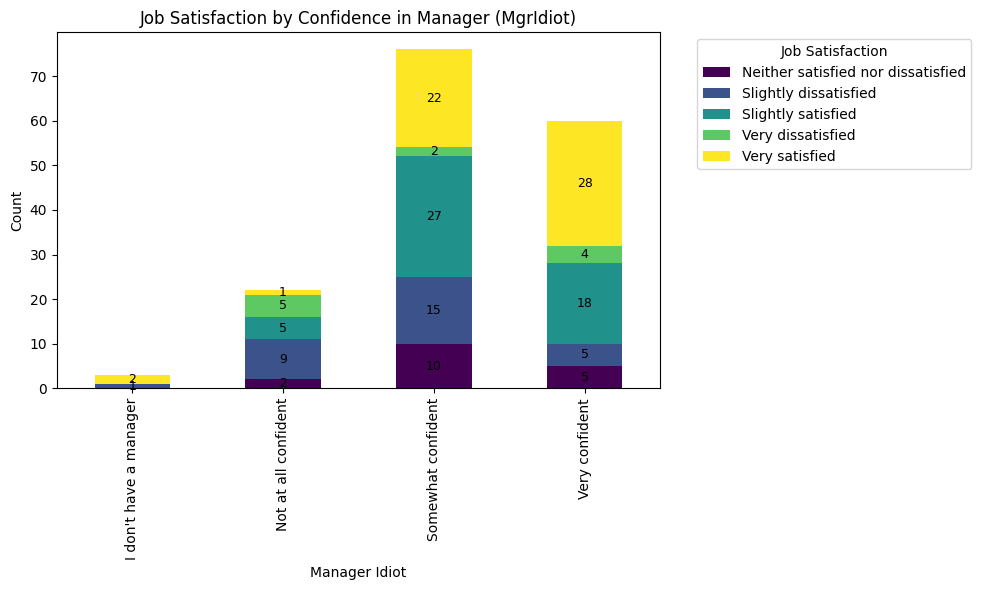

In [43]:
df_management_pd = df_management.toPandas()

df_pivot = df_management_pd.groupby(['MgrIdiot', 'JobSat']).size().unstack(fill_value=0)

ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        width = p.get_width()
        x = p.get_x() + width / 2  # X position of the label
        y = p.get_y() + height / 2  # Y position of the label
        ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=9, color='black')

plt.title('Job Satisfaction by Confidence in Manager (MgrIdiot)')
plt.xlabel('Manager Idiot')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
df_management.groupBy("MgrMoney").count().show(truncate=False)

+--------+-----+
|MgrMoney|count|
+--------+-----+
|No      |79   |
|Yes     |56   |
|Not sure|26   |
+--------+-----+



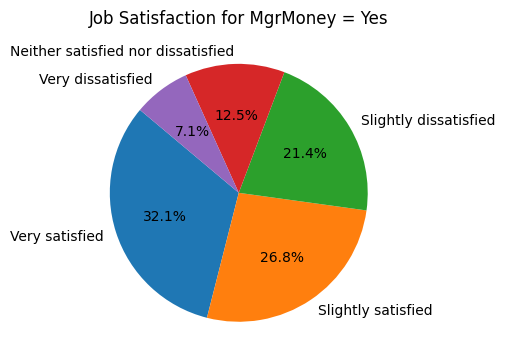

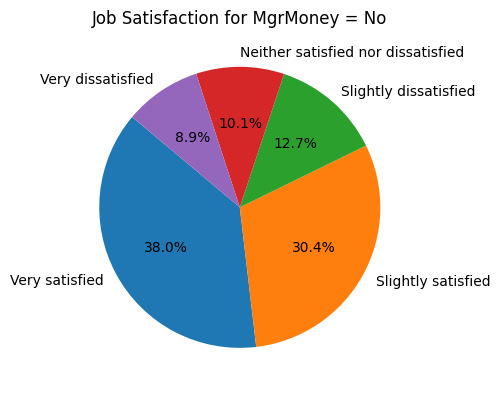

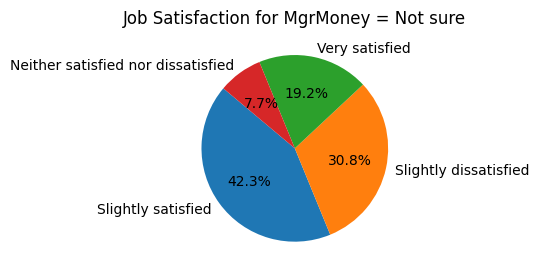

In [ ]:
for value in ['Yes', 'No', 'Not sure']:
    subset = df_management_pd[df_management_pd['MgrMoney'] == value]['JobSat'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Job Satisfaction for MgrMoney = {value}')
    plt.tight_layout()
    plt.show()

In [49]:
df_management.groupBy("MgrWant").count().show(truncate=False)

+----------------------+-----+
|MgrWant               |count|
+----------------------+-----+
|I am already a manager|13   |
|No                    |41   |
|Yes                   |51   |
|Not sure              |56   |
+----------------------+-----+



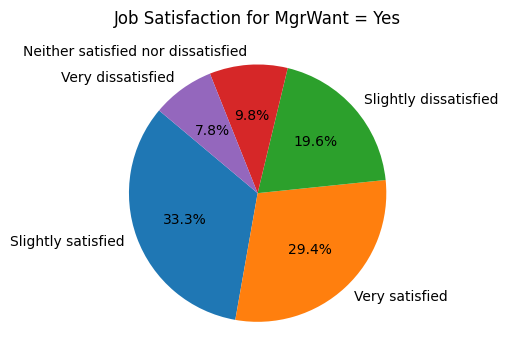

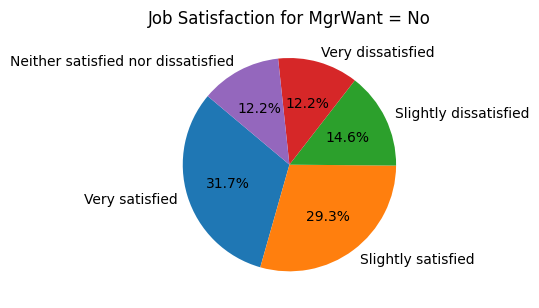

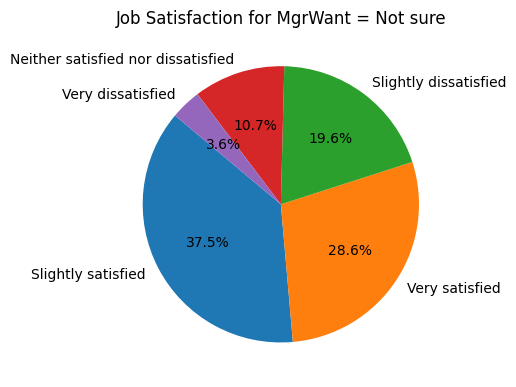

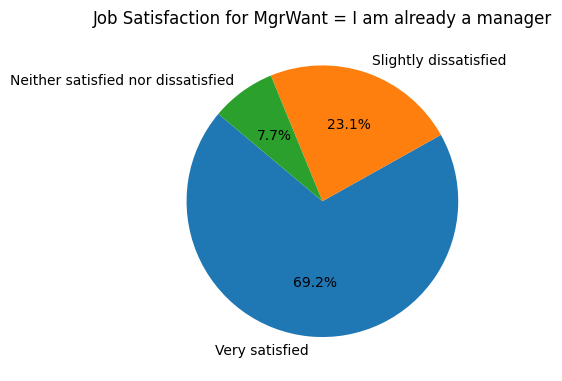

In [50]:
for value in ['Yes', 'No', 'Not sure', 'I am already a manager']:
    subset = df_management_pd[df_management_pd['MgrWant'] == value]['JobSat'].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Job Satisfaction for MgrWant = {value}')
    plt.tight_layout()
    plt.show()

**Analysis of Management Factors on Job Satisfaction (JobSat)**:

---

##### **Correlation Heatmap**

► **MgrIdiot** (manager confidence) shows the **strongest positive correlation** with JobSat (0.33).
► **MgrMoney** (motivated by money) and **MgrWant** (want a manager) show weak or even negative correlation.

**Insight**: Trusting your manager matters more than whether they motivate you with money or whether you want one.

---

##### **Confidence in Manager (MgrIdiot) vs JobSat**

► **Very confident** respondents mostly report being **Very satisfied**.
► **Not at all confident** leads to spikes in **dissatisfaction**.
► Those with **no manager** still report decent satisfaction.

**Conclusion**: **Manager competency is a major JobSat driver.** No confidence = low morale.

---

##### **MgrMoney = Yes / No / Not sure**

► All groups show healthy satisfaction, but:

* **No**: Highest percentage of **Very satisfied** (38%).
* **Not sure**: More split with **Slightly satisfied** dominating.
* **Yes**: Balanced, but lower on top satisfaction.

**Implication**: Employees **not driven by money** may derive fulfillment from **intrinsic motivation**, not just paychecks.

---

##### **MgrWant = Yes / No / Not sure / I am already a manager**

► **“I am already a manager”** has the **highest very satisfied rate** (69.2%) — shows autonomy and leadership boost morale.
► **Not sure** and **Yes** also lean towards **slightly or very satisfied**.
► **No** is the most mixed, with more dissatisfaction surfacing.

**Takeaway**: Wanting a manager or being one doesn't guarantee satisfaction — **clarity of role and autonomy** seems key.

---

##### Final Insight:

► **Strong confidence in leadership = high satisfaction**
► **Money and title (wanting manager)** are **less predictive**
► Let people work with leaders they believe in — or empower them to lead 